# Gather

In [427]:
#Includes the necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import tweepy 
import json
import re
import seaborn as sb
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [428]:
#Import 'twitter-archive-enhanced' the Data
df_archive=pd.read_csv("twitter-archive-enhanced.csv")

In [429]:
#Download 'image-predictions.tsv' programatically and the import the data
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
os.listdir(folder_name)    
df_pred=pd.read_csv("image_predictions/image-predictions.tsv",sep="\t") 

In [430]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [431]:
#Reading tweet.json file line by line and store it in df_tweet_info_info dataset
file_path='tweet_json.txt'
with open(file_path) as json_file:
    df_tweet=pd.DataFrame(columns=['tweet_id','favorite_count','retweet_count','retweeted'])
    for line in json_file:
        l=json.loads(line)
        df_tweet=df_tweet.append({'tweet_id':l['id'],
                          'favorite_count':l['favorite_count'],
                          'retweet_count':l['retweet_count'],
                          'retweeted':l['retweeted']},ignore_index=True)

# Assess

In [432]:
#Checking some rows for data sanctity
df_tweet.head()

,tweet_id,favorite_count,retweet_count,retweeted
0,892420643555336193,39467,8853,False
1,892177421306343426,33819,6514,False
2,891815181378084864,25461,4328,False
3,891689557279858688,42908,8964,False
4,891327558926688256,41048,9774,False


In [433]:
#Checking for NUll values if any, and datatypes.
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null object
retweet_count     2354 non-null object
retweeted         2354 non-null object
dtypes: object(4)
memory usage: 73.6+ KB


In [434]:
#Checking for duplicates values and other statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [435]:
#Getting glimpse of data
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [436]:
#Checking for NUll values if any, and datatypes.
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [437]:
#Checking for duplicates values and other statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [438]:
#Checking those tweets having rating_denominator equal to zero, as we already verified above that minimum value of it is Zero.
df_archive.query('rating_denominator==0').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [439]:
#Checking the number of re-tweets.
sum(df_archive[df_archive.text.str[:2]=='RT']['tweet_id'].value_counts())

183

In [440]:
#Checking for any duplicate tweets.
sum(df_archive['tweet_id'].duplicated())

0

In [441]:
#Check for name column of archive table. We can see some erroneous data in it.Most of the them are None.
df_archive.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Bailey       7
Toby         7
Daisy        7
Buddy        7
an           7
Stanley      6
Koda         6
Name: name, dtype: int64

In [442]:
#Checking for NUll values if any, and datatypes.
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [443]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [444]:
#Checking for duplicates values and other statistics
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality Issue:

### df_archive table
   1. Remove the rows from df_archive table which are retweet.
   2. 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' column can be deleted.         
   3. 'timestamp'  should be datetime.
   4. Remove the redundant text from 'source' column.
   5. Extract Name from 'text' and revalidate the already given name.
   6. Extract rating from 'text' and revalidate the already given ratings.
   7. rating_denominator is zero for tweet_id: 835246439529840640. Numerator should be 13 and denominator 10.
   8. Add a 'rating' Column to see which is the most rated one.
   9. Extract short_url from 'text ' column.
   10. Extract 'posted_on' column from 'expanded_urls' column.

### df_tweet table 
   11. tweet_id, favorite_count, retweet_count shound be converted to integer.

### df_pred table   
   12. Rename the columns of df_pred and remove the not so useful columns.

### Tidiness Issue:
   1. df_archive and df_tweet should be merged.
   2. doggo, floofer, pupper, puppo should in merged into one column 'dog_stage'.
   3. df_archive and df_pred should be merged.

## Clean

In [445]:
#Create copy of original dataset for cleaning purposes
df_archive_clean=df_archive.copy()

In [446]:
#Create copy of original dataset for cleaning purposes
df_tweet_clean=df_tweet.copy()

In [447]:
#Create copy of original dataset for cleaning purposes
df_pred_clean=df_pred.copy()

### Define
#### 1. Remove the rows from df_archive table which are retweet.

### Code

In [448]:
#Remove the re-tweets.
df_archive_clean=df_archive[df_archive.text.str[:2]!='RT']

### Test

In [449]:
#Verifying whether are-tweets are removed.
df_archive['tweet_id'].shape[0]-df_archive_clean['tweet_id'].shape[0]

183

### Define
#### 2. 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' column can be deleted.

### Code

In [450]:
#Removing redundant columns
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [451]:
#Lets verify the dataset how it looks before moving forward
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
#### 3. 'timestamp'  should be datetime.

### Code

In [452]:
#Data type conversion
df_archive_clean['timestamp']=pd.to_datetime(df_archive_clean['timestamp'])

### Test

In [453]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2115 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.7+ KB


### Define 
#### 4. Remove the redundant text from 'source' column.

### Code

In [454]:
#Extracting only meaningful text from source
df_archive_clean['source']=df_archive_clean.source.str.split('>').str[1].str[:-3]

### Test

In [455]:
df_archive_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define
####  5. Extract Name from 'text' and revalidate the already given name.

### Code

In [456]:
# To guess the correct pattern to extract dog name from text
# Name followed by phrase like "This is", "THIS IS","named", "Meet", "name is","hello to","name to","RIP","featuring".

keywords=['named','name is','name to','This is','THIS IS','Meet','hello to','this is','RIP','featuring','NAME. IS.']

def dog_name(txt):
    for key in keywords:
        if key in txt:
            return  re.findall(r'{} (\S+)'.format(key), txt)[0]
        else:
            pass    

In [457]:
# Extract name from text
df_archive_clean['dog_name']=df_archive_clean.text.apply(dog_name)

In [458]:
#Some cleaning
df_archive_clean['dog_name']=df_archive_clean['dog_name'].str.replace('.','')
df_archive_clean['dog_name']=df_archive_clean['dog_name'].str.replace(',','')

In [459]:
#Real name in the tweet starts with Capital letter. Hence,Lowercase one is not dog name and should be replace with none.
df_archive_clean.loc[df_archive_clean['dog_name'].str.islower()==True,'dog_name']="None"

In [460]:
#Remove dog name with 'None' with NaN
df_archive_clean['dog_name'].replace("None",np.NaN,inplace=True)

In [461]:
df_archive_clean['dog_name']=df_archive_clean['dog_name'].str.title()

In [462]:
#Drop the column 'name'
df_archive_clean.drop('name',axis=1,inplace=True)

### Test

In [463]:
sum(df_archive_clean.dog_name.value_counts())

1428

In [464]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,Tilly


### Define
#### 6. Extract rating from 'text' and revalidate the already given ratings.

### Code

In [465]:
#Extracting rating from text using regular expression (some of the numerators are fraction)
df_archive_clean['rating_comb']=df_archive_clean['text'].str.extract(r'([0-9]+[0-9.]*/[0-9]+[0-9]*)',expand=False)

In [466]:
#Let's have a look how extracted data are
df_archive_clean['rating_comb'].value_counts()

12/10       499
10/10       441
11/10       425
13/10       307
9/10        155
8/10         98
7/10         52
14/10        43
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
4/20          2
0/10          2
420/10        2
11.26/10      1
20/16         1
1/2           1
88/80         1
44/40         1
80/80         1
1776/10       1
007/10        1
84/70         1
45/50         1
11.27/10      1
165/150       1
9.5/10        1
11/15         1
24/7          1
13.5/10       1
9.75/10       1
121/110       1
9/11          1
60/50         1
204/170       1
50/50         1
17/10         1
15/10         1
666/10        1
182/10        1
144/120       1
99/90         1
143/130       1
960/00        1
7/11          1
Name: rating_comb, dtype: int64

In [467]:
# Total sum equal to 2173 verifies that we have covered all tweets
sum(df_archive_clean['rating_comb'].value_counts())

2173

In [468]:
#Separate Numerator
df_archive_clean['rating_Num']=df_archive_clean.rating_comb.str.split('/').str[0]

In [469]:
#Separate Denominator
df_archive_clean['rating_Denom']=df_archive_clean.rating_comb.str.split('/').str[1]

In [470]:
#Convert Numerator into float as some of the data are fraction.
df_archive_clean['rating_Num']=df_archive_clean['rating_Num'].astype(float)

In [471]:
#Convert Denominator into float
df_archive_clean['rating_Denom']=df_archive_clean['rating_Denom'].astype(float)

In [472]:
#Comparing with already given ratings. Fractions numerator are not captured correctly
df_archive_clean[(df_archive_clean['rating_Num']==df_archive_clean['rating_numerator'])==False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_name,rating_comb,rating_Num,rating_Denom
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,None,None,None,None,Bella,13.5/10,13.50,10.0
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,None,None,None,None,Logan,9.75/10,9.75,10.0
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,None,None,pupper,None,Sophie,11.27/10,11.27,10.0
1689,681340665377193984,2015-12-28 05:07:27,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,5,10,None,None,None,None,None,9.5/10,9.50,10.0
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,11.26/10,11.26,10.0


In [473]:
df_archive_clean[(df_archive_clean['rating_Denom']==df_archive_clean['rating_denominator'])==False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_name,rating_comb,rating_Num,rating_Denom


In [474]:
#Now as our extracted numerator and denominator are more accurate.
#It if safe to  Drop the column 'rating_comb','rating_numerator','rating_denominator'
df_archive_clean.drop(['rating_comb','rating_numerator','rating_denominator'],axis=1,inplace=True)

### Define
#### 7. rating_denominator is zero for tweet_id: 835246439529840640. Numerator should be 13 and denominator 10.

### Code

In [475]:
df_archive_clean[df_archive_clean['tweet_id']==835246439529840640]

,tweet_id,timestamp,source,text,expanded_urls,doggo,floofer,pupper,puppo,dog_name,rating_Num,rating_Denom
313,835246439529840640,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,None,None,None,None,None,960.0,0.0


In [476]:
print(df_archive_clean['text'][313])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [477]:
df_archive_clean.loc[313,'rating_Num']=13.0
df_archive_clean.loc[313,'rating_Denom']=10.0

### Test

In [478]:
df_archive_clean[df_archive_clean['tweet_id']==835246439529840640]

,tweet_id,timestamp,source,text,expanded_urls,doggo,floofer,pupper,puppo,dog_name,rating_Num,rating_Denom
313,835246439529840640,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,None,None,None,None,None,13.0,10.0


### Define
#### 8. Add a 'rating' Column to see which is the most rated one.

### Code

In [479]:
#Calculate Rating
df_archive_clean['rating']=df_archive_clean['rating_Num']/df_archive_clean['rating_Denom']

### Test

In [480]:
#Maximum Rating
df_archive_clean[df_archive_clean['rating']==df_archive_clean['rating'].max()]

,tweet_id,timestamp,source,text,expanded_urls,doggo,floofer,pupper,puppo,dog_name,rating_Num,rating_Denom,rating
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,None,None,None,None,Atticus,1776.0,10.0,177.6


In [481]:
#Minimum Rating
df_archive_clean[df_archive_clean['rating']==df_archive_clean['rating'].min()]

,tweet_id,timestamp,source,text,expanded_urls,doggo,floofer,pupper,puppo,dog_name,rating_Num,rating_Denom,rating
315,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,None,None,None,None,None,0.0,10.0,0.0
1016,746906459439529985,2016-06-26 03:22:31,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,None,None,None,None,None,0.0,10.0,0.0


### Define
#### 9. Extract short_url from 'text ' column.

### Code

In [482]:
#Extracting short url from text
df_archive_clean.loc[:,'sort_url']=df_archive_clean['text'].str.extract(r'([a-zA-Z]+://[a-zA-Z0-9./]*)',expand=False)

### Test

In [483]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,doggo,floofer,pupper,puppo,dog_name,rating_Num,rating_Denom,rating,sort_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,Phineas,13.0,10.0,1.3,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,Tilly,13.0,10.0,1.3,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,Archie,12.0,10.0,1.2,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,None,None,None,None,Darla,13.0,10.0,1.3,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,None,None,None,None,Franklin,12.0,10.0,1.2,https://t.co/AtUZn91f7f
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,13.0,10.0,1.3,https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",None,None,None,None,Jax,13.0,10.0,1.3,https://t.co/Zr4hWfAs1H
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,13.0,10.0,1.3,https://t.co/v0nONBcwxq
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,None,None,None,None,Zoey,13.0,10.0,1.3,https://t.co/9TwLuAGH0b
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,doggo,None,None,None,Cassie,14.0,10.0,1.4,https://t.co/t1bfwz5S2A


### Define
#### 10. Extract 'posted_on' column from 'expanded_urls' column.

### Code

In [484]:
#Some cleaning
code=['/www.','/us.','/m.']
for c in code:
    df_archive_clean['expanded_urls']=df_archive_clean['expanded_urls'].str.replace(c,'/')

In [485]:
df_archive_clean['posted_on']=df_archive_clean['expanded_urls'].str.split('/').str[2].str.split('.').str[0]

### Test

In [486]:
df_archive_clean['posted_on'].value_counts()

twitter          1994
vine               90
gofundme           22
blastingnews        3
petfinder           2
facebook            1
loveyourmelon       1
youtube             1
goo                 1
Name: posted_on, dtype: int64

### Define
#### 11. tweet_id, favorite_count, retweet_count shound be converted to integer.

### Code

In [487]:
#Data type conversion
df_tweet_clean['tweet_id']= df_tweet_clean['tweet_id'].astype(int)
df_tweet_clean['favorite_count']= df_tweet_clean['favorite_count'].astype(int)
df_tweet_clean['retweet_count']= df_tweet_clean['retweet_count'].astype(int)

In [488]:
df_tweet_clean.drop('retweeted',axis=1,inplace=True)

### Test

In [489]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Define
#### 12. Rename the columns of df_pred and remove the not so useful columns.

### Code

In [490]:
# For each tweet_id we will choose only highest confidence interval algorithm i.e p1 
# Hence delete the other column and rename the remaining ones.
df_pred_clean.drop(['p2','p2_conf','p2_dog','p3','p3_dog','p3_conf'],axis=1,inplace=True)

In [491]:
df_pred_clean.rename(columns={'p1':'breed_predicted','p1_conf':'pred_confidence','p1_dog':'is_dog'},inplace=True)

### Test

In [492]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id           2075 non-null int64
jpg_url            2075 non-null object
img_num            2075 non-null int64
breed_predicted    2075 non-null object
pred_confidence    2075 non-null float64
is_dog             2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


## Tidiness

### Define
#### 1. doggo, floofer, pupper, puppo should in merged into one column 'dog_stage'.

### Code

In [493]:
#Remove 'None' with ' ' in 'doggo', 'floofer','pupper', 'puppo'
df_archive_clean['doggo'].replace('None','',inplace=True)
df_archive_clean['floofer'].replace('None','',inplace=True)
df_archive_clean['pupper'].replace('None','',inplace=True)
df_archive_clean['puppo'].replace('None','',inplace=True)

In [494]:
df_archive_clean['dog_stage']=df_archive_clean['doggo']+df_archive_clean['floofer']+df_archive_clean['pupper']+df_archive_clean['puppo']

In [495]:
df_archive_clean['dog_stage'].value_counts()

                1829
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [496]:
#Now, Let's format the column for multi-stages or cases where dog_stage is None.
df_archive_clean.loc[df_archive_clean.dog_stage=='doggopupper','dog_stage']='Doggo,Pupper'
df_archive_clean.loc[df_archive_clean.dog_stage=='doggofloofer','dog_stage']='Doggo,Floofer'
df_archive_clean.loc[df_archive_clean.dog_stage=='doggopuppo','dog_stage']='Doggo,Puppo'
df_archive_clean.loc[df_archive_clean.dog_stage=='','dog_stage']=np.nan

In [497]:
df_archive_clean.drop(['doggo', 'floofer','pupper', 'puppo'],axis=1,inplace=True)

### Test

In [498]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2173 non-null int64
timestamp        2173 non-null datetime64[ns]
source           2173 non-null object
text             2173 non-null object
expanded_urls    2115 non-null object
dog_name         1428 non-null object
rating_Num       2173 non-null float64
rating_Denom     2173 non-null float64
rating           2173 non-null float64
sort_url         2115 non-null object
posted_on        2115 non-null object
dog_stage        344 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 300.7+ KB


### Define
#### 2. df_archive_clean and df_tweet_clean should be merged.

### Code

In [499]:
#Merging Table
df_archive_clean=pd.merge(df_archive_clean,df_tweet_clean,on='tweet_id',how='left')

### Test

In [500]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 14 columns):
tweet_id          2173 non-null int64
timestamp         2173 non-null datetime64[ns]
source            2173 non-null object
text              2173 non-null object
expanded_urls     2115 non-null object
dog_name          1428 non-null object
rating_Num        2173 non-null float64
rating_Denom      2173 non-null float64
rating            2173 non-null float64
sort_url          2115 non-null object
posted_on         2115 non-null object
dog_stage         344 non-null object
favorite_count    2173 non-null int64
retweet_count     2173 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 254.6+ KB


### Define
#### 3. df_archive_clean and df_pred_clean should be merged.

### Code

In [501]:
#Merging Table
df_archive_clean=pd.merge(df_archive_clean,df_pred_clean,on='tweet_id',how='left')

### Test

In [502]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,dog_name,rating_Num,rating_Denom,rating,sort_url,posted_on,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed_predicted,pred_confidence,is_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13.0,10.0,1.3,https://t.co/MgUWQ76dJU,twitter,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13.0,10.0,1.3,https://t.co/0Xxu71qeIV,twitter,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True


In [503]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 19 columns):
tweet_id           2173 non-null int64
timestamp          2173 non-null datetime64[ns]
source             2173 non-null object
text               2173 non-null object
expanded_urls      2115 non-null object
dog_name           1428 non-null object
rating_Num         2173 non-null float64
rating_Denom       2173 non-null float64
rating             2173 non-null float64
sort_url           2115 non-null object
posted_on          2115 non-null object
dog_stage          344 non-null object
favorite_count     2173 non-null int64
retweet_count      2173 non-null int64
jpg_url            1993 non-null object
img_num            1993 non-null float64
breed_predicted    1993 non-null object
pred_confidence    1993 non-null float64
is_dog             1993 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(10)
memory usage: 339.5+ KB


### After completing all the steps of Data Wrangling. Export the final dataset into CSV.

In [504]:
#Output the df_archive_clean as 'tweet_archive_master.csv'
df_archive_clean.to_csv('twitter_archive_master.csv',index=False)

## Analysing and Visualization

### 1. As per available Data, We have Maximum number of tweets posted in 2016.

In [505]:
df_archive_clean['timestamp'].dt.year.value_counts()

2016    1087
2015     687
2017     399
Name: timestamp, dtype: int64

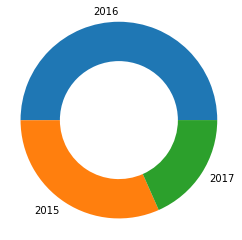

In [506]:
#Plotting Donut Chart to see the trend
plt.pie(df_archive_clean['timestamp'].dt.year.value_counts(),labels=df_archive_clean['timestamp'].dt.year.value_counts().index,wedgeprops={'width':0.4});
plt.axis('square');

### 2. Top 5 most rated Dogs.

In [507]:
label=df_archive_clean.loc[df_archive_clean['rating'].nlargest(1).index,'dog_name']

Text(0.5,0,'804    Atticus\nName: dog_name, dtype: object')

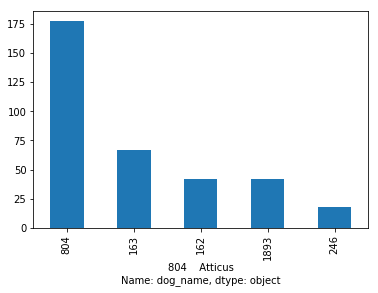

In [508]:
#A bar chart plotting to show the trend
df_archive_clean['rating'].nlargest(5).plot(kind='bar');
plt.xlabel(label)

### 3. Favorite Count V/s Retweet Count trend visualization.

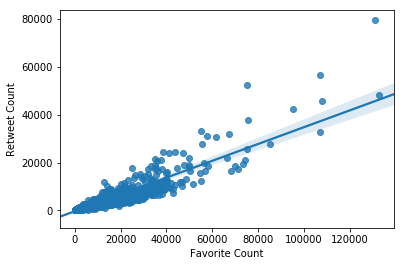

In [509]:
#Scatterplot
sb.regplot(data=df_archive_clean,x='favorite_count',y='retweet_count');
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');

### 4. Source Distribution of the Tweets

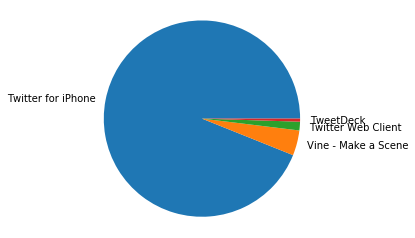

In [510]:
#Data visualization using Pie chart
plt.pie(df_archive_clean['source'].value_counts(),labels=df_archive_clean['source'].value_counts().index);
plt.axis('square');

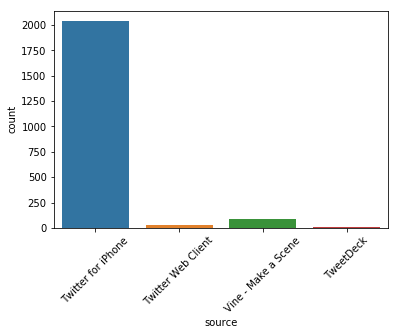

In [511]:
#Bar chart plotting
sb.countplot(data=df_archive_clean,x='source');
plt.xticks(rotation=45);

#### 5. Top 10 most tweeted Dogs breeds.

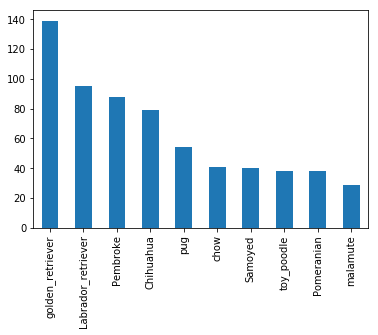

In [512]:
#Bar chart plotting
df_archive_clean[df_archive_clean['is_dog']==True].breed_predicted.value_counts().nlargest(10).plot(kind='bar');